# LEAGUE (title tba)

**Name(s)**: Palina Volskaya & Hieu Ngyuen

**Website Link**: (your website link)

In [14]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [15]:
league = pd.read_csv('data/LoL2022data.csv')
league.head()

/var/folders/1s/9mz1pc250jq_ghnqsy2by5l00000gn/T/ipykernel_23948/2780366950.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



gameid datacompleteness  url league  ...  deathsat25  \
0  ESPORTSTMNT01_2690210         complete  NaN   LCKC  ...         1.0   
1  ESPORTSTMNT01_2690210         complete  NaN   LCKC  ...         2.0   
2  ESPORTSTMNT01_2690210         complete  NaN   LCKC  ...         0.0   
3  ESPORTSTMNT01_2690210         complete  NaN   LCKC  ...         2.0   
4  ESPORTSTMNT01_2690210         complete  NaN   LCKC  ...         2.0   

  opp_killsat25  opp_assistsat25 opp_deathsat25  
0           0.0              2.0            0.0  
1           1.0              5.0            1.0  
2           3.0              4.0            3.0  
3           3.0              4.0            0.0  
4           0.0              7.0            2.0  

[5 rows x 164 columns]

In [16]:
league = pd.read_csv('data/LoL2022data.csv')
league.columns[:100]
player_data = league[league['position'].isin(['top', 'jng', 'mid', 'bot', 'sup'])]
fig = px.scatter(player_data, 
                 x='earnedgold', 
                 y='damagetochampions',
                 color='position',
                 hover_data=['playername', 'champion'],
                 title='Earned Gold vs Damage to Champions by Position',
                 labels={'earnedgold': 'Earned Gold', 
                         'damagetochampions': 'Damage to Champions'})
fig.show()

/var/folders/1s/9mz1pc250jq_ghnqsy2by5l00000gn/T/ipykernel_23948/2050772367.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



## Step 2: Data Cleaning and Exploratory Data Analysis

In [17]:
players = league[league['position']!='team']
teams = league[league['position']=='team']
teams

gameid datacompleteness  \
10      ESPORTSTMNT01_2690210         complete   
11      ESPORTSTMNT01_2690210         complete   
22      ESPORTSTMNT01_2690219         complete   
...                       ...              ...   
150575       9687-9687_game_4          partial   
150586       9687-9687_game_5          partial   
150587       9687-9687_game_5          partial   

                                                url league  ...  deathsat25  \
10                                              NaN   LCKC  ...         7.0   
11                                              NaN   LCKC  ...         6.0   
22                                              NaN   LCKC  ...         8.0   
...                                             ...    ...  ...         ...   
150575  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   
150586  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   
150587  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   

       opp_killsat25  opp_assistsat25 opp_deathsat25  
10               7.0             22.0            6.0  
11               6.0             12.0            7.0  
22               8.0             13.0            1.0  
...              ...              ...            ...  
150575           NaN              NaN            NaN  
150586           NaN              NaN            NaN  
150587           NaN              NaN            NaN  

[25098 rows x 164 columns]

## Step 3: Assessment of Missingness

After analyzing the dataset aggregated by teams, we found the `pick1` column to be NMAR due to its inability to be predicted from other columns, and the missingness potentially occuring due to a variable not included in the dataset. Unlike many of the columns we analyzed, the missingness of `pick1` did not depend on league, as many leagues didn't report certain variables as a whole. Instead, 31 out of the 55 leagues had missingness for `pick1` specifically. The missingness also did not depend on `teamid`, as 381 out of 593 teams had a missing value in `pick1`. Instead, the column's missingness depends on the value itself - the champion chosen. Missingness in this column can occur due to the champion being a newly added character to the game, resulting in a null value being recorded. Additional data that would make this column MAR would be data about whether the champion is a newly added character at the time of the game. 

In [138]:
observed_statistic = teams[teams['goldat25'].isna()]['gamelength'].mean()
observed_means = []
for i in range(1, 500):
    permuted_gamelengths = teams.copy()
    permuted_gamelengths['permuted_lengths'] = np.random.permutation(teams['gamelength'])
    observed_means.append(permuted_gamelengths[permuted_gamelengths['goldat25'].isna()]['permuted_lengths'].mean())
sum(observed_statistic >= observed_means) / 1000
gamelength_plot = px.histogram(observed_means)
gamelength_plot.add_vline(x=observed_statistic, line_dash="dash", line_color="red", line_width=2, opacity=1)
gamelength_plot.update_layout(showlegend=False)

In [ ]:
observed_statistic = teams[teams['goldat25'].isna()]['firstdragon'].mean()
observed_means = []
for i in range(1, 500):
    permuted_firstdragons = teams.copy()
    permuted_firstdragons['permuted_lengths'] = np.random.permutation(teams['firstdragon'])
    observed_means.append(permuted_firstdragons[permuted_firstdragons['goldat25'].isna()]['permuted_lengths'].mean())
sum(observed_statistic >= observed_means) / 1000
fig2 = px.histogram(observed_means)
fig2.add_vline(x=observed_statistic, line_dash="dash", line_color="red", line_width=2, opacity=1)
fig2.update_layout(showlegend=False)

## Step 4: Hypothesis Testing

In [ ]:
drop_na_first_dragon = teams.loc[league['firstdragon'].notna()]
# grouped = teams.groupby(['gameid','teamid']).sum()
dropped_columns = teams[['gameid','teamid','firstdragon','result']]
N = 1000
# Observed difference in proportions
obs_diff = dropped_columns[dropped_columns['firstdragon'] == 1]['result'].mean() - \
           dropped_columns[dropped_columns['firstdragon'] == 0]['result'].mean()

# Permutation test
n_permutations = 10000
diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    shuffled = np.random.permutation(dropped_columns['result'])
    diffs[i] = shuffled[dropped_columns['firstdragon'] == 1].mean() - \
               shuffled[dropped_columns['firstdragon'] == 0].mean()

# Two-sided p-value
p_value = np.sum(diffs >= obs_diff) / N

print("Observed difference:", obs_diff)
print(f"Permutation p-value: {p_value:.3g}")

Observed difference: 0.1567548733522614
Permutation p-value: 0


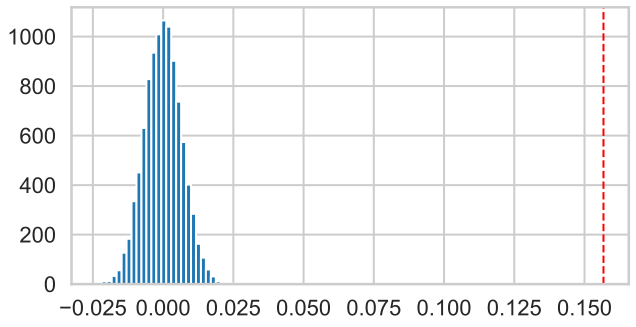

In [ ]:
plt.hist(diffs,bins=30)
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=2,
            label=f'Observed diff = {obs_diff:.3f}')

## Step 5: Framing a Prediction Problem

## Step 6: Baseline Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
cols = teams.columns
cols = [i for i in cols if '25' in i]
cols.append('result')
X_train, X_test, y_train, y_test = train_test_split(
    teams[['goldat10','xpat10']], teams['result'], test_size=0.2, random_state=42, stratify=teams['result']
)

pipe = Pipeline([       # preprocessing step
    ("clf", DecisionTreeClassifier(
    criterion="gini",     # or "entropy", "log_loss"
    max_depth=None,       # None = grow until pure / min_samples
    random_state=42       # controls randomness (None = fully random each run)
))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.3f}")
precision = y_pred @ y_test / y_pred.sum()
recall = y_pred @ y_test / y_test.sum()
print(f'precision: {precision:.3f}')
print(f'recall: {recall:.3f}')

Test accuracy: 0.549
precision: 0.543
recall: 0.617


## Step 7: Final Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold 
final= teams[cols].dropna(axis=0,how="any")
X_train, X_test, y_train, y_test = train_test_split(
    final[[i for i in cols if i != 'result']].astype(int),final['result'], test_size=0.2, random_state=42
)
pl = Pipeline([
 ('clf', RandomForestClassifier(
 random_state=42,
 n_jobs=-1,
 ))
])
n_features = X_train.shape[1]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
hyperparameters = {
 'clf__max_depth': [None, 5, 10, 20],
 'clf__n_estimators': [100, 200, 300, 500],
 'clf__max_features':list({
        'sqrt',
        'log2',
    }),
 'clf__bootstrap': [True, False],
}
grids = GridSearchCV(
 pl,
 n_jobs=-1, 
 param_grid=hyperparameters,
 return_train_score=True,
 cv=kf,
 scoring="accuracy",
 verbose=2,
)
grids.fit(X_train, y_train)
print("Best params:", grids.best_params_)
print("Best CV score:", grids.best_score_)
print("Test score:", grids.score(X_test, y_test))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
predictions = grids.predict(X_test)
precision = predictions @ y_test / predictions.sum()
recall = predictions @ y_test / y_test.sum()
print(f'precision: {precision:.3f}')
print(f'recall: {recall:.3f}')


precision: 0.853
recall: 0.842


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
import itertools
final_no_result = final[[i for i in cols if i !="result"]]
final_result = final['result']
combinations =itertools.combinations(final_no_result.columns,r=2)
dict = {}
for combination in combinations:
    dict[f'{combination[0]}_{combination[1]}'] = final_no_result[combination[0]]*final_no_result[combination[1]]
fe_final = pd.DataFrame(dict)
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    fe_final,final_result, test_size=0.2, random_state=42
)
grids.fit(X_train_fe, y_train_fe)
print("Best params:", grids.best_params_)
print("Best CV score:", grids.best_score_)
print("Test score:", grids.score(X_test_fe, y_test_fe))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
predictions = grids.predict(X_test_fe)
precision = predictions @ y_test_fe / predictions.sum()
recall = predictions @ y_test_fe / y_test_fe.sum()
print(f'precision: {precision:.3f}')
print(f'recall: {recall:.3f}')

precision: 0.851
recall: 0.843


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


## Step 8: Fairness Analysis

In [ ]:
leagues = teams['league'].unique()
dataframe = {}
for league in leagues:
    filtered_no_results = teams[teams['league']==league][[i for i in cols if i !='result']]
    filtered_results = teams[teams['league']==league]['result']
    combinations =itertools.combinations(filtered_no_results.columns,r=2)
    dict = {}
    for combination in combinations:
        dict[f'{combination[0]}_{combination[1]}'] = filtered_no_results[combination[0]]*filtered_no_results[combination[1]]
    filtered_final = pd.DataFrame(dict)
    predictions = grids.predict(filtered_final)
    precision = predictions @ filtered_results / predictions.sum()
    recall = predictions @ filtered_results / filtered_results.sum()
    
    dataframe[league] = {"precision": precision,"recall":recall}

split_dataframe = pd.DataFrame(dataframe).T
split_dataframe.plot(y='precision',kind='bar')


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27116\836924692.py:12: RuntimeWarning:

invalid value encountered in scalar divide

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_

In [ ]:
LCL = teams[teams['league']=='LCL'][cols]
not_LCL =teams[teams['league']!='LCL'][cols] 
not_LCL

goldat25   xpat25  csat25  opp_goldat25  ...  opp_killsat25  \
10       40224.0  45960.0   767.0       40136.0  ...            7.0   
11       40136.0  49931.0   864.0       40224.0  ...            6.0   
22       39335.0  49409.0   895.0       46615.0  ...            8.0   
...          ...      ...     ...           ...  ...            ...   
150575       NaN      NaN     NaN           NaN  ...            NaN   
150586       NaN      NaN     NaN           NaN  ...            NaN   
150587       NaN      NaN     NaN           NaN  ...            NaN   

        opp_assistsat25  opp_deathsat25  result  
10                 22.0             6.0       0  
11                 12.0             7.0       1  
22                 13.0             1.0       0  
...                 ...             ...     ...  
150575              NaN             NaN       0  
150586              NaN             NaN       0  
150587              NaN             NaN       1  

[25066 rows x 16 columns]